In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving dataset placement.csv to dataset placement (1).csv


In [ ]:
df = pd.read_csv("dataset placement.csv")
print("First 5 rows:")
print(df.head())

First 5 rows:
          city  cgpa     iq  placement
0     New York   6.8  123.0          1
1  Los Angeles   5.9  106.0          0
2      Chicago   NaN  121.0          0
3     New York   7.4  132.0          1
4  Los Angeles   5.8  142.0          0


In [ ]:
df = df.drop(columns=['city'])

In [ ]:
df.describe()

,cgpa,iq,placement
count,92.000000,96.000000,100.000000
mean,5.965217,117.916667,0.460000
std,1.164911,46.913508,0.500908
min,3.300000,1.000000,0.000000
25%,5.000000,90.000000,0.000000
50%,6.000000,122.000000,0.000000
75%,6.825000,146.750000,1.000000
max,8.500000,233.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       92 non-null     float64
 1   iq         96 non-null     float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.isna().sum()

,0
cgpa,0
iq,0
placement,0


In [ ]:
df['cgpa']=df['cgpa'].fillna(df["cgpa"].mode()[0])
df['iq']=df['iq'].fillna(df["iq"].mode()[0])
print(df.isna().sum())

cgpa         0
iq           0
placement    0
dtype: int64


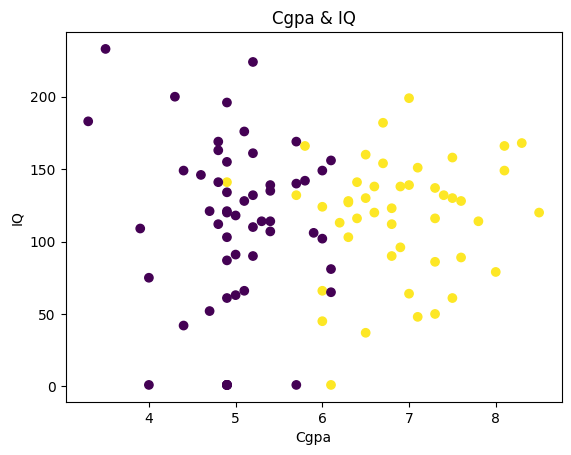

In [ ]:
plt.scatter(df['cgpa'], df['iq'],c=df['placement'])
plt.title("Cgpa & IQ")
plt.xlabel("Cgpa")
plt.ylabel("IQ")

plt.plot()
plt.show()

In [ ]:
X = df.drop(columns=['placement'])
y = df['placement']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
62,6.0,102.0
66,6.9,96.0
60,4.9,1.0
13,6.4,116.0
73,4.9,61.0
...,...,...
17,3.3,183.0
27,6.0,124.0
11,6.9,138.0
40,4.9,134.0


In [ ]:
X_test

,cgpa,iq
35,6.8,90.0
47,5.2,161.0
88,4.4,149.0
28,5.2,90.0
15,5.1,176.0
0,6.8,123.0
93,6.8,112.0
2,4.9,121.0
80,4.9,196.0
69,8.5,120.0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)

In [ ]:
X_train

array([[ 0.10339008, -0.1714791 ],
       [ 0.89344639, -0.28636584],
       [-0.86223429, -2.10540592],
       [ 0.45452622,  0.09658996],
       [-0.86223429, -0.9565385 ],
       [ 0.54231025,  0.36465903],
       [-0.86223429,  0.17318113],
       [ 0.36674219, -0.15233131],
       [ 1.68350269,  0.05829438],
       [ 0.36674219,  0.32636345],
       [-0.07217798,  1.05397948],
       [-0.51109815,  0.05829438],
       [-1.30115446, -1.32034652],
       [-1.65229059, -2.10540592],
       [-0.15996202,  0.55613693],
       [ 1.94685479,  1.05397948],
       [ 0.71787832,  1.36034412],
       [ 1.06901446,  0.76676262],
       [ 1.50793462, -0.42040037],
       [-0.42331412,  0.53698914],
       [-0.59888219,  0.40295461],
       [-0.42331412,  0.46039798],
       [-0.86223429, -2.10540592],
       [-0.77445025, -0.38210479],
       [ 1.85907076, -0.61187828],
       [-0.95001832,  1.11142285],
       [ 1.24458252,  0.09658996],
       [-0.68666622,  0.32636345],
       [ 2.12242286,

In [ ]:
X_test = sc.fit_transform(X_test)

In [ ]:
X_test

array([[ 0.76638358, -1.29703926],
       [-0.53809911,  0.8054673 ],
       [-1.19034045,  0.45011408],
       [-0.53809911, -1.29703926],
       [-0.61962928,  1.24965883],
       [ 0.76638358, -0.3198179 ],
       [ 0.76638358, -0.64555835],
       [-0.78268961, -0.37904344],
       [-0.78268961,  1.8419142 ],
       [ 2.15239644, -0.40865621]])

In [ ]:
Model = LogisticRegression()

In [ ]:
Model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
Model.predict(X_test)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
y_test

,placement
35,1
47,0
88,0
28,0
15,0
0,1
93,1
2,0
80,0
69,1


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Model.predict(X_test))

1.0